## 1. The Problem Statement 
We have data of sales of house in some area. For each house we have complete information about size, price, number of bedrooms, number of bathrooms, whether it is made of bricks, neighbourhood.

In this we would try to predict the sales of houses using the dataset provided. We are suing KNN Regressor with Python and Scikit-Learn.

The dataset that I am using here is "House_Prices.csv"

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

## 3. Import Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving House_Prices.csv to House_Prices.csv


In [3]:
df = pd.read_csv("House_Prices.csv")

## 4. Exploratory Data Analysis

*   We have imported the data.
*   Now, it's time to explore the data and gain some insights about it



In [4]:
df.head() #Preview the dataset

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
df.tail() #Preview the last 5 rows of the dataset

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


In [6]:
df.shape  #View dimensions of data

(128, 8)

In [7]:
df.columns #view the column names

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

Since the "Home" feature is an identifier, so dropping the column from the data

In [8]:
df_index = pd.DataFrame(df)

In [9]:
#df_index.reset_index(drop = True, inplace = True)
#df_index.set_index('Home')

In [10]:
df_index.drop('Home', axis = 'columns', inplace = True)

In [11]:
df_index.head() #view the data

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [12]:
df = df_index

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.1+ KB


In [14]:
df[['Bedrooms', 'Bathrooms', 'Offers']] = df[['Bedrooms', 'Bathrooms', 'Offers']].astype('object')

In [15]:
df.shape #new shape after deleting the Home feature

(128, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    object
 3   Bathrooms     128 non-null    object
 4   Offers        128 non-null    object
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.1+ KB


In [17]:
df.describe() #viewing the statistical properties of numerical values

,Price,SqFt
count,128.000000,128.000000
mean,130427.343750,2000.937500
std,26868.770371,211.572431
min,69100.000000,1450.000000
25%,111325.000000,1880.000000
50%,125950.000000,2000.000000
75%,148250.000000,2140.000000
max,211200.000000,2590.000000


We see that there is no missing values in the data set. There is a little difference in the mean and median value of Price column and Sqft column.

In [18]:
df.describe(include = 'object')

,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
count,128,128,128,128,128
unique,4,3,6,2,3
top,3,2,3,No,East
freq,67,72,46,86,45


## 5. Univeriate Analysis

In [19]:
df['Bedrooms'].value_counts()

3    67
2    30
4    29
5     2
Name: Bedrooms, dtype: int64

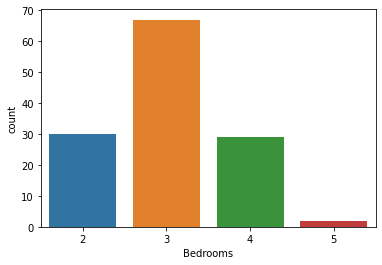

In [20]:
ax = sns.countplot(x = 'Bedrooms', data = df)
plt.show()

In [21]:
df['Bathrooms'].value_counts()

2    72
3    55
4     1
Name: Bathrooms, dtype: int64

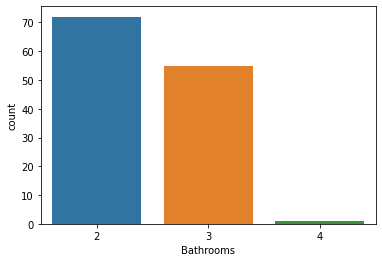

In [22]:
ax = sns.countplot(x = 'Bathrooms', data = df)
plt.show()

In [23]:
df['Offers'].value_counts()

3    46
2    36
1    23
4    19
5     3
6     1
Name: Offers, dtype: int64

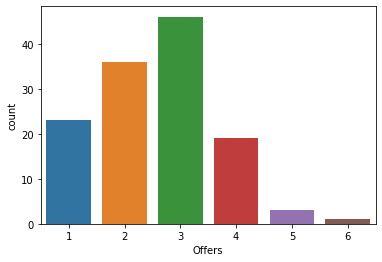

In [24]:
ax = sns.countplot(x = 'Offers', data = df)
plt.show()

In [25]:
df['Brick'].value_counts()

No     86
Yes    42
Name: Brick, dtype: int64

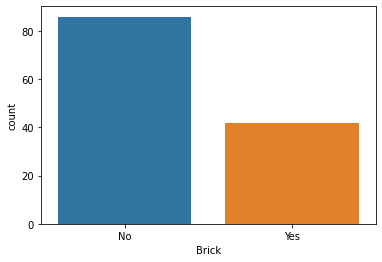

In [26]:
ax = sns.countplot(x = 'Brick', data = df)
plt.show()

In [27]:
df['Neighborhood'].value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

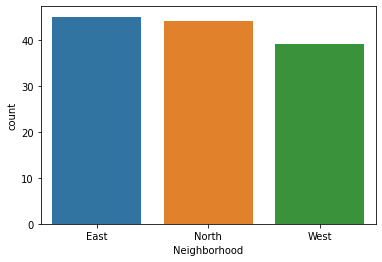

In [28]:
ax = sns.countplot(x = 'Neighborhood', data = df)
plt.show()

In [29]:
fig = px.histogram(df, x = 'Price', marginal = 'box')
fig.update_layout(bargap = 0.1)
fig.show()  #for Price column

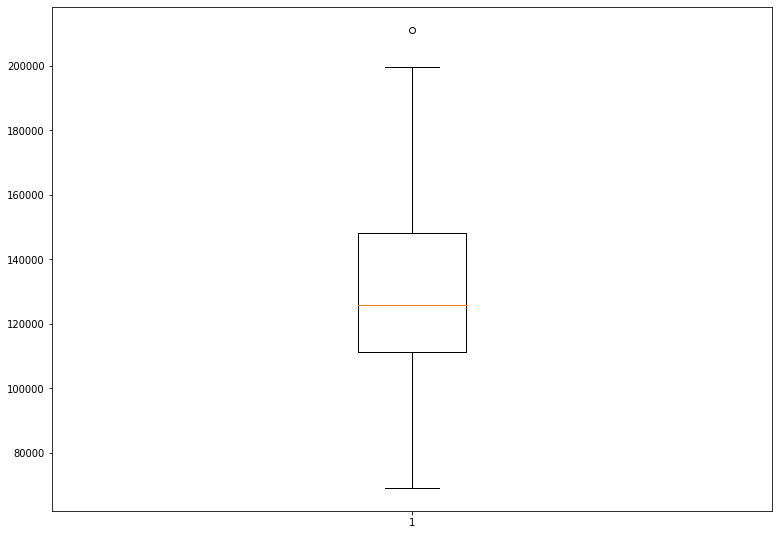

In [30]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(df['Price'])
plt.show() #for Price column

By the above graphs, we understand there is one outlier in the target data i.e. Price column. Let's see the records

In [31]:
df[df['Price']> 199500 ]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
103,211200,2440,4,3,3,Yes,West


In [32]:
df.loc[(df['Bedrooms'] >= 4) & (df['Bathrooms'] >= 3) & (df['Offers'] >= 3) & (df['Brick'] >= 'Yes') & (df['Neighborhood'] >= 'West')]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
30,182000,2250,4,3,3,Yes,West
77,176500,2280,4,3,3,Yes,West
94,160600,2150,4,3,3,Yes,West
103,211200,2440,4,3,3,Yes,West


We see that with the same features we have total 4 records but one of the prices is much higher and falls outside the maximum range but is near to it. Let us not drop this record and continue with it as there is only one outlier.

In [33]:
fig = px.histogram(df, x = 'SqFt', marginal = 'box')
fig.update_layout(bargap = 0.1)
fig.show()

In [34]:
df.loc[(df['SqFt'] <= 1520) | (df['SqFt'] >= 2530)]

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
14,176800,2590,4,3,4,No,West
65,111100,1450,2,2,1,Yes,North
84,90500,1520,2,2,3,No,North
105,146900,2530,4,3,4,No,West


## 6. Bivariate Analysis

We will check the correlation of all the features with "Price" which is the target variable

<function matplotlib.pyplot.show>

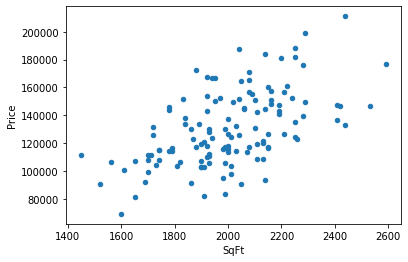

In [35]:
df.plot(kind = 'scatter', x = 'SqFt', y = 'Price')
plt.show

In [36]:
df['SqFt'].corr(df['Price'])

0.5529822425554839

From the above scatter plot and Correlation coefficient we understand that the "SqFt" and "Price" have moderate positive correlation.


In [37]:
df['Price'].groupby(df['Bedrooms']).agg(['mean', 'max', 'min'])

,mean,max,min
Bedrooms,,,
2,115260.000000,164800,69100
3,125732.835821,180900,81300
4,154265.517241,211200,102700
5,169550.000000,199500,139600


Here we can see that as the Bedrooms increases, the average Price also increases

In [38]:
df['Price'].groupby(df['Bathrooms']).agg(['mean', 'max', 'min'])

,mean,max,min
Bathrooms,,,
2,118627.777778,164800,69100
3,144618.181818,211200,83600
4,199500.000000,199500,199500


Here we can see that as the Bathrooms increases, the average Price also increases

In [39]:
df['Price'].groupby(df['Offers']).agg(['mean', 'max', 'min'])

,mean,max,min
Offers,,,
1,145239.130435,199500,106600
2,132861.111111,188300,99300
3,126693.478261,211200,69100
4,121073.684211,176800,82300
5,117533.333333,126300,103200
6,90300.000000,90300,90300


Here we see that greater the offers, lesser is the price

In [40]:
df['Price'].groupby(df['Brick']).agg(['mean','max','min'])

,mean,max,min
Brick,,,
No,121958.139535,180900,69100
Yes,147769.047619,211200,106100


From the above we understand that the houses made with bricks are costlier than the houses not made with bricks

In [41]:
df['Price'].groupby(df['Neighborhood']).agg(['mean','max','min'])

,mean,max,min
Neighborhood,,,
East,125231.111111,157100,82300
North,110154.545455,150200,69100
West,159294.871795,211200,129800


Houses with East neighborhood are the cheapest followed by North and then the West

## 8. Feature Engineering

In [42]:
df.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


In [43]:
df['Brick'] = df['Brick'].astype('category')

In [44]:
df['Neighborhood'] = df['Neighborhood'].astype('category')

In [45]:
df['Bedrooms'] = df['Bedrooms'].astype('category')

In [46]:
df['Bathrooms'] = df['Bathrooms'].astype('category')

In [47]:
df['Offers'] = df['Offers'].astype('category')

In [48]:
df.dtypes

Price              int64
SqFt               int64
Bedrooms        category
Bathrooms       category
Offers          category
Brick           category
Neighborhood    category
dtype: object

In [49]:
model_data = pd.DataFrame(df)

In [50]:
model_data = pd.get_dummies(model_data,drop_first = True)

In [51]:
model_data.head()

,Price,SqFt,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,0,0,0,0,0,1,0,0,0,0,0,0,0
1,114200,2030,0,1,0,0,0,0,1,0,0,0,0,0,0
2,114800,1740,1,0,0,0,0,0,0,0,0,0,0,0,0
3,94700,1980,1,0,0,0,0,0,1,0,0,0,0,0,0
4,119800,2130,1,0,0,1,0,0,1,0,0,0,0,0,0


In [52]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Price               128 non-null    int64
 1   SqFt                128 non-null    int64
 2   Bedrooms_3          128 non-null    uint8
 3   Bedrooms_4          128 non-null    uint8
 4   Bedrooms_5          128 non-null    uint8
 5   Bathrooms_3         128 non-null    uint8
 6   Bathrooms_4         128 non-null    uint8
 7   Offers_2            128 non-null    uint8
 8   Offers_3            128 non-null    uint8
 9   Offers_4            128 non-null    uint8
 10  Offers_5            128 non-null    uint8
 11  Offers_6            128 non-null    uint8
 12  Brick_Yes           128 non-null    uint8
 13  Neighborhood_North  128 non-null    uint8
 14  Neighborhood_West   128 non-null    uint8
dtypes: int64(2), uint8(13)
memory usage: 3.8 KB


In [53]:
model_data.shape

(128, 15)

## 8. Declare feature and target variables

In [54]:
X = model_data.drop(['Price'], axis = 1)
y = df['Price']

## 9. Feature Engineering

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))

In [56]:
X_scaled = scaler.fit_transform(X)

In [57]:
X = pd.DataFrame(data = X_scaled, columns = list(X.columns))

In [58]:
X.head()

,SqFt,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0.298246,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.508772,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.254386,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.464912,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.596491,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 9.Splitting into separate Test and Train set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [60]:
X_train.shape , X_test.shape

((89, 14), (39, 14))

## 10. Running the algorithm

# 10.1 KNN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
from math import sqrt

In [64]:
rmse_val_list = []
for k in range(0, int(sqrt(len(model_data)))):
  k = k + 1
  model = KNR(n_neighbors= k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = sqrt(mean_squared_error(y_pred, y_test))
  print('RMSE value for k = ', k, 'is', error)
  rmse_val_list.append(error)

RMSE value for k =  1 is 16695.239610171087
RMSE value for k =  2 is 16434.924118146417
RMSE value for k =  3 is 17144.761561563024
RMSE value for k =  4 is 17838.505869793767
RMSE value for k =  5 is 17955.955800734995
RMSE value for k =  6 is 17292.955311883605
RMSE value for k =  7 is 17117.961776584714
RMSE value for k =  8 is 15688.415541779179
RMSE value for k =  9 is 16093.047246371565
RMSE value for k =  10 is 16217.860287587026
RMSE value for k =  11 is 16265.096399392862


In [65]:
print("The min error we get is ", min(rmse_val_list))

The min error we get is  15688.415541779179


In [66]:
print("The corresponding k value is ", 1 + rmse_val_list.index((min(rmse_val_list))))

The corresponding k value is  8


In [69]:
model.score(X_test,y_test)

0.601082233957996